Calculating global scale...
Global value range: -11.60 to 18.41
Using scale: -18.41 to 18.41
Using threshold: 3.00

Processing pIPS_right...
Group average saved to: group_average_tool_pIPS_right_1217.nii.gz


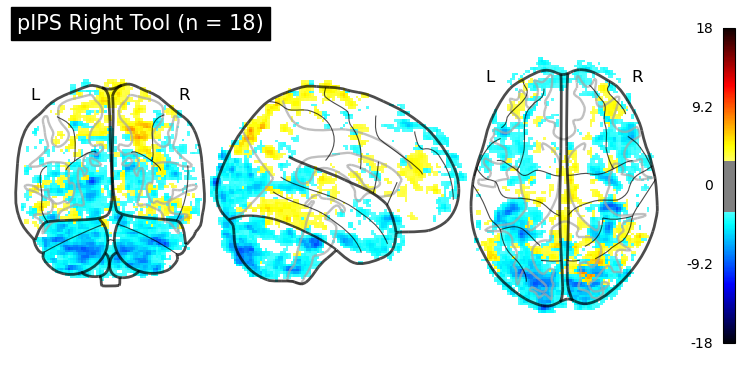


Processing pIPS_left...
Group average saved to: group_average_tool_pIPS_left_1217.nii.gz


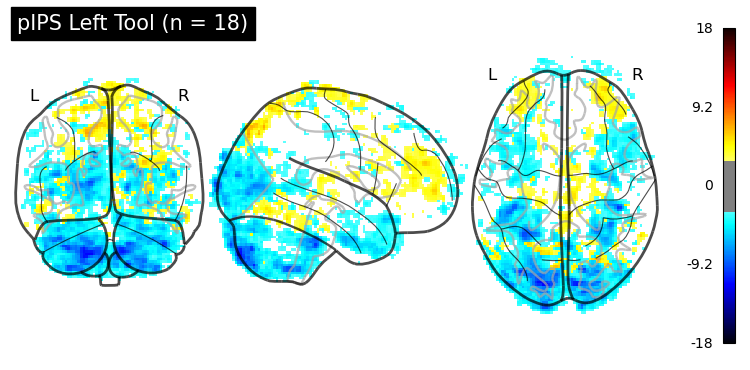


Processing LO_right...
Group average saved to: group_average_tool_LO_right_1217.nii.gz


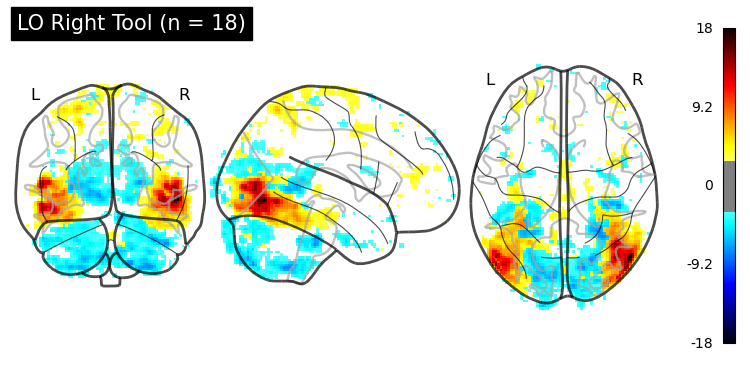


Processing LO_left...
Group average saved to: group_average_tool_LO_left_1217.nii.gz


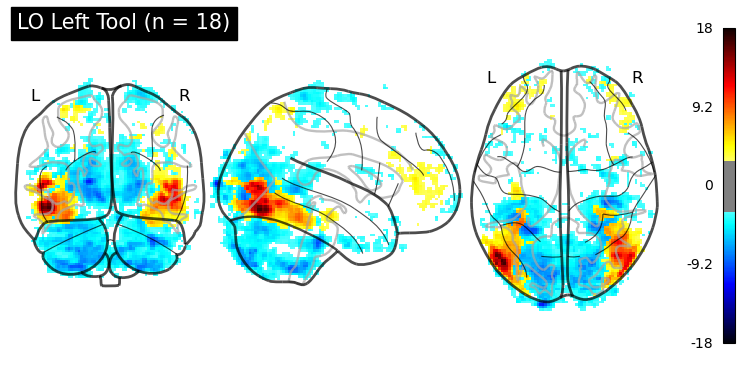


Processing complete.


In [3]:
# TOOL
# searchlight plots, red means roi predicts region, blue means region predicts roi

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import glob
import os
import re

def load_and_average(file_pattern):
    """Helper function to load and average files"""
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching the pattern: {file_pattern}")
        return None, None, []
    
    # Extract and sort subject numbers
    subject_files = {}
    for f in files:
        match = re.search(r'sub-spaceloc(\d+)', f)  # Updated regex pattern
        if match:
            subject_files[match.group(1)] = f
    
    sorted_subjects = sorted(subject_files.keys(), key=int)
    
    # Load all images
    images = [nib.load(subject_files[subject]) for subject in sorted_subjects]
    
    # Check if all images have the same shape
    shapes = [img.shape for img in images]
    if len(set(shapes)) > 1:
        print("Error: Not all images have the same shape.")
        return None, None, []
    
    # Calculate the average
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)
    
    return avg_data, avg_img, sorted_subjects

def find_global_scale(base_path, regions):
    """Find global min and max values across all group averages"""
    all_averages = []
    
    for region in regions:
        file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni_1217.nii.gz'  # Updated pattern
        avg_data, _, _ = load_and_average(file_pattern)
        if avg_data is not None:
            all_averages.append(avg_data)
    
    if all_averages:
        global_min = min(np.min(avg) for avg in all_averages)
        global_max = max(np.max(avg) for avg in all_averages)
        return global_min, global_max
    return None, None

def group_average(file_pattern, region, vmin, vmax, threshold):
    # Load and average data
    avg_data, avg_img, sorted_subjects = load_and_average(file_pattern)
    
    if avg_img is None:
        return
    
    # Save the average image
    output_path = f'group_average_tool_{region}_1217.nii.gz'  # Updated filename
    nib.save(avg_img, output_path)
    print(f"Group average saved to: {output_path}")

    # Format the title: split the region name and format it nicely
    region_parts = region.split('_')
    if len(region_parts) == 2:
        title = f"{region_parts[0]} {region_parts[1].capitalize()} Tool (n = {len(sorted_subjects)})"  # Added 'Tool'

    # Display the average image with consistent scaling
    plotting.plot_glass_brain(avg_img, threshold=threshold, colorbar=True, 
                            plot_abs=False, vmin=vmin, vmax=vmax,
                            title=title)
    plt.show()

# Base path
base_path = '/lab_data/behrmannlab/vlad/ptoc'

# Regions to process
regions = ['pIPS_right', 'pIPS_left', 'LO_right', 'LO_left']

# First find global min and max
print("Calculating global scale...")
global_min, global_max = find_global_scale(base_path, regions)
print(f"Global value range: {global_min:.2f} to {global_max:.2f}")

# Set symmetric limits based on the absolute maximum value
sym_max = max(abs(global_min), abs(global_max))
vmin, vmax = -sym_max, sym_max
##to manually set the scales replace the above line with the following line
#vmin, vmax = -25, 25

# Set threshold as a percentage of the maximum value (e.g., 10%)
#threshold = 0.1 * sym_max # this ends up being 1.84
#threshold = 4 # looks the clearest matches exp 1
threshold = 3

print(f"Using scale: {vmin:.2f} to {vmax:.2f}")
print(f"Using threshold: {threshold:.2f}")

# Loop through regions
for region in regions:
    print(f"\nProcessing {region}...")
    file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni_1217.nii.gz'
    group_average(file_pattern, region, vmin=vmin, vmax=vmax, threshold=threshold)

print("\nProcessing complete.")

Calculating global scale...
Global value range: -11.60 to 18.41
Using scale: -18.41 to 18.41
Using threshold: 3.00

Processing pIPS_right...
Group average saved to: group_average_tool_pIPS_right_1217.nii.gz


/home/csimmon2/anaconda3/envs/brainiak_env/lib/python3.7/site-packages/ipykernel_launcher.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


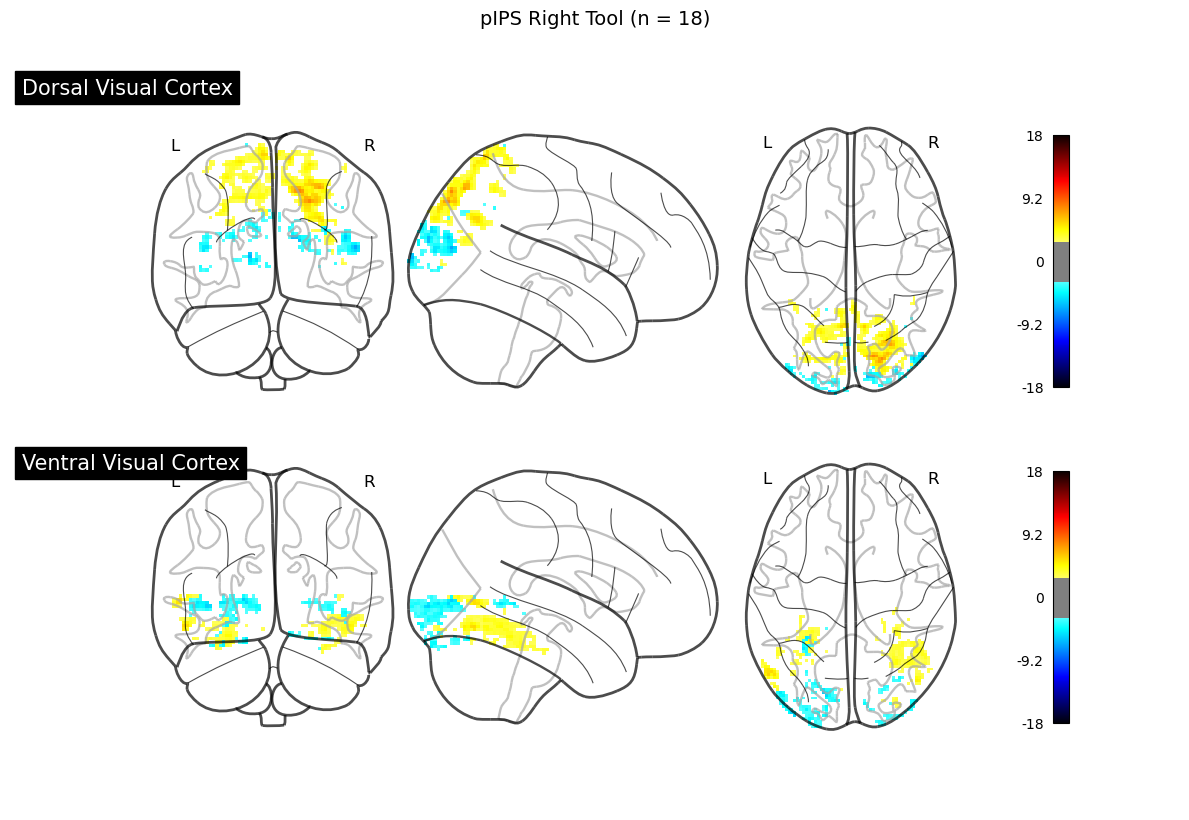


Processing pIPS_left...
Group average saved to: group_average_tool_pIPS_left_1217.nii.gz


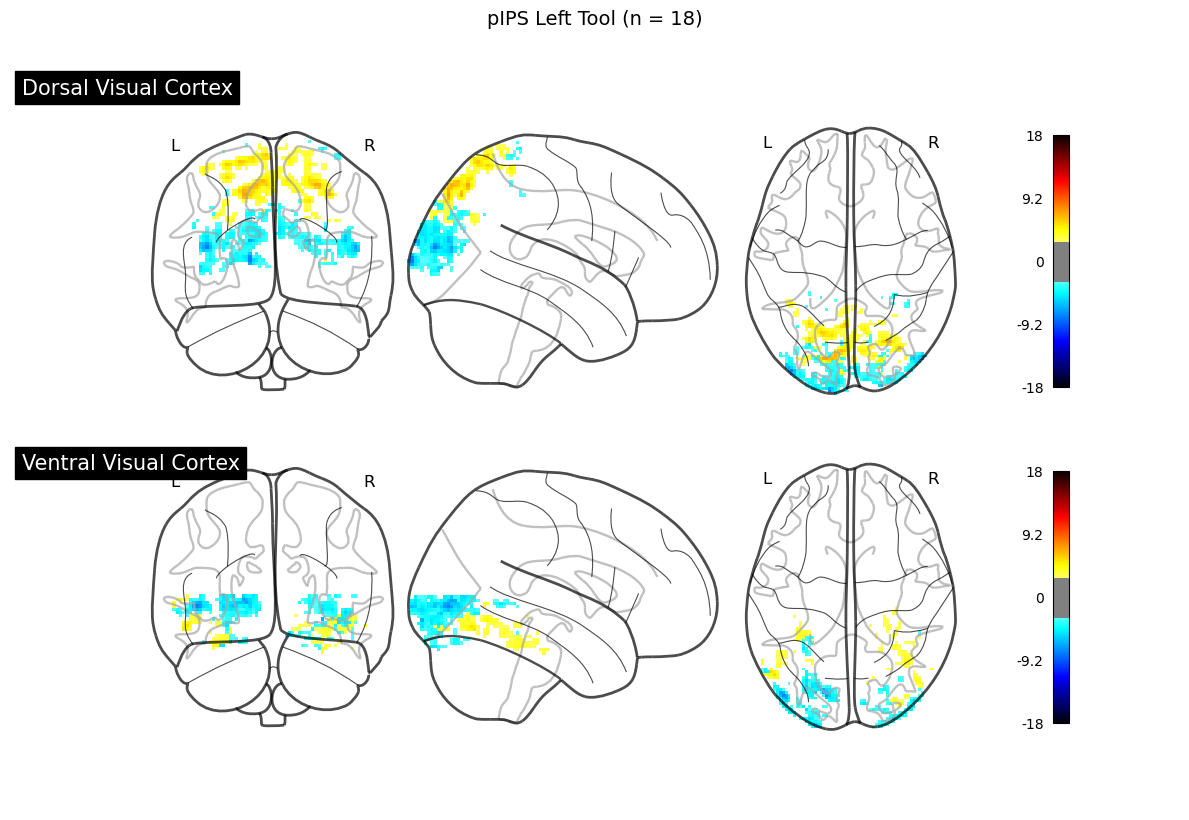


Processing LO_right...
Group average saved to: group_average_tool_LO_right_1217.nii.gz


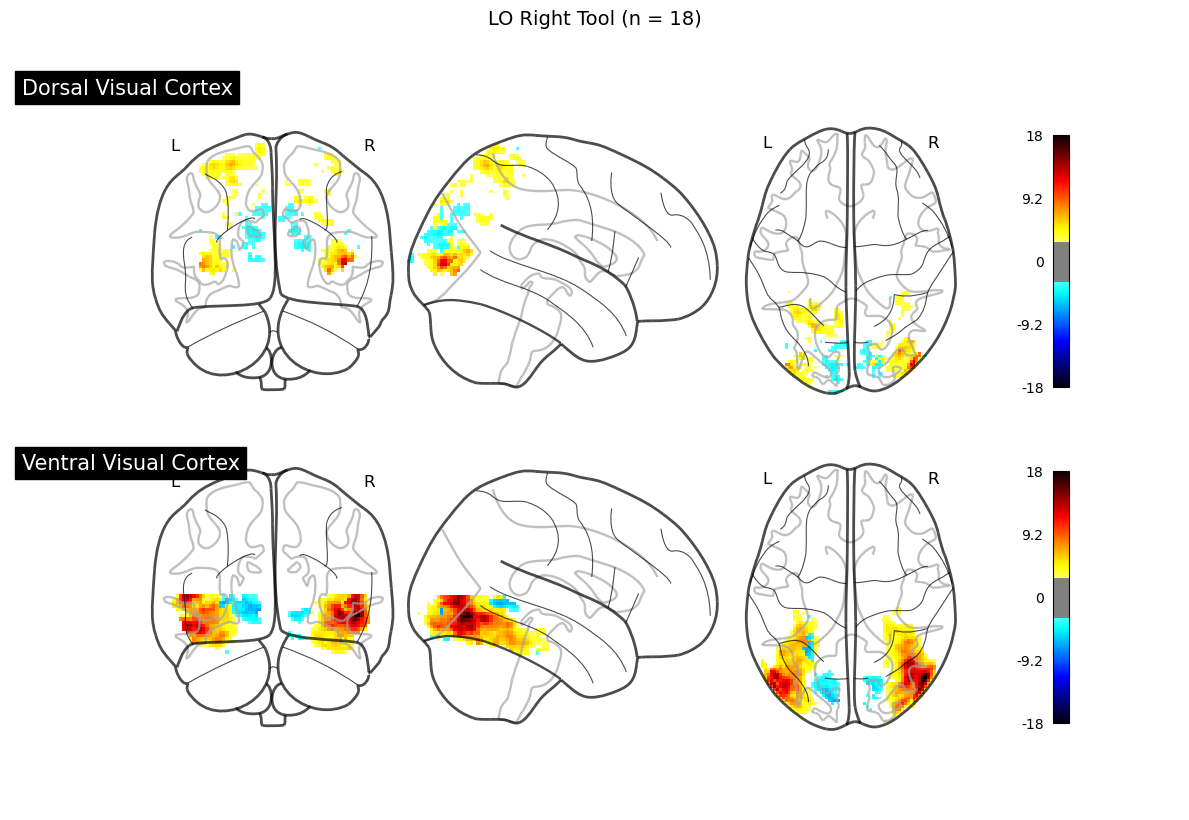


Processing LO_left...
Group average saved to: group_average_tool_LO_left_1217.nii.gz


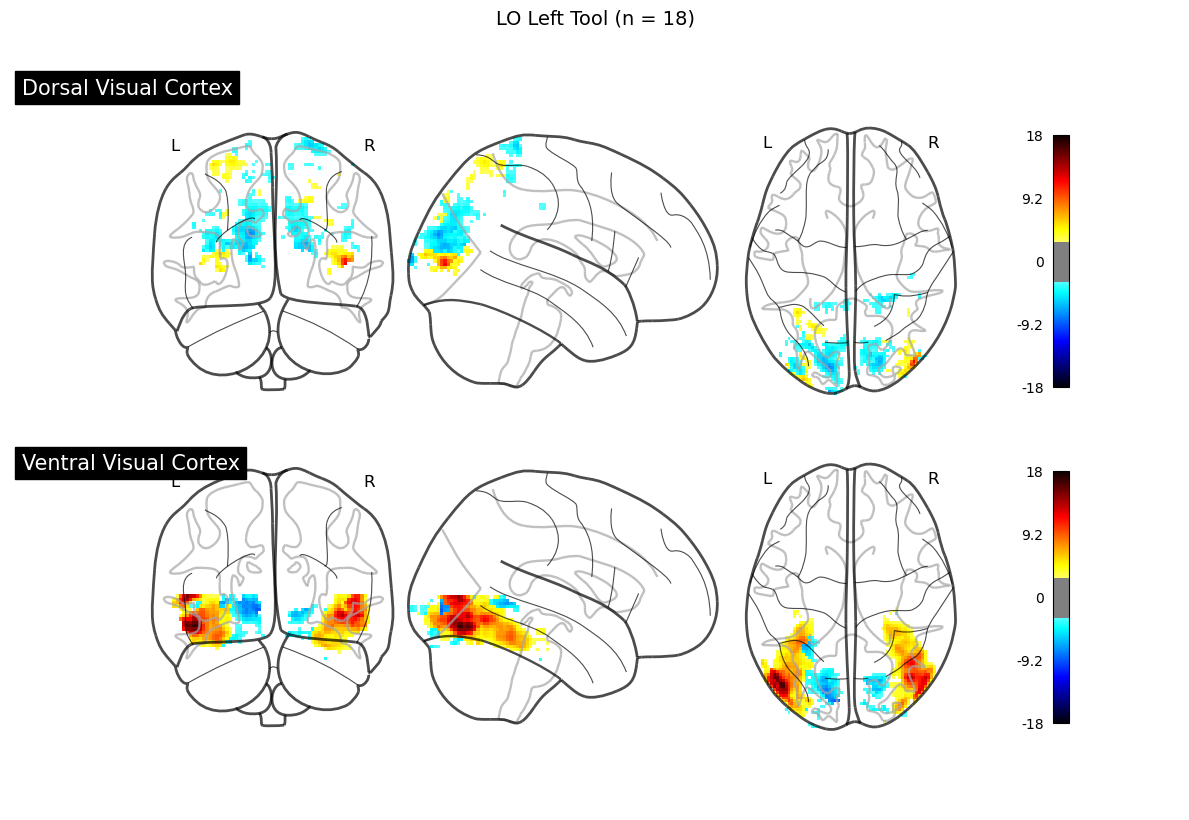


Processing complete.


In [12]:
# TOOL
# searchlight plots, red means roi predicts region, blue means region predicts roi

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
import glob
import os
import re

def load_and_average(file_pattern):
    """Helper function to load and average files"""
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching the pattern: {file_pattern}")
        return None, None, []
    
    # Extract and sort subject numbers
    subject_files = {}
    for f in files:
        match = re.search(r'sub-spaceloc(\d+)', f)
        if match:
            subject_files[match.group(1)] = f
    
    sorted_subjects = sorted(subject_files.keys(), key=int)
    
    # Load all images
    images = [nib.load(subject_files[subject]) for subject in sorted_subjects]
    
    # Check if all images have the same shape
    shapes = [img.shape for img in images]
    if len(set(shapes)) > 1:
        print("Error: Not all images have the same shape.")
        return None, None, []
    
    # Calculate the average
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)
    
    return avg_data, avg_img, sorted_subjects

def find_global_scale(base_path, regions):
    """Find global min and max values across all group averages"""
    all_averages = []
    
    for region in regions:
        file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni_1217.nii.gz'
        avg_data, _, _ = load_and_average(file_pattern)
        if avg_data is not None:
            all_averages.append(avg_data)
    
    if all_averages:
        global_min = min(np.min(avg) for avg in all_averages)
        global_max = max(np.max(avg) for avg in all_averages)
        return global_min, global_max
    return None, None

def group_average(file_pattern, region, vmin, vmax, threshold):
    # Load and average data
    avg_data, avg_img, sorted_subjects = load_and_average(file_pattern)
    
    if avg_img is None:
        return
    
    # Save the average image
    output_path = f'group_average_tool_{region}_1217.nii.gz'
    nib.save(avg_img, output_path)
    print(f"Group average saved to: {output_path}")

    # Format the title
    region_parts = region.split('_')
    if len(region_parts) == 2:
        title = f"{region_parts[0]} {region_parts[1].capitalize()} Tool (n = {len(sorted_subjects)})"

    # Load masks
    mask_dir = '/user_data/csimmon2/git_repos/ptoc/roiParcels'
    dorsal_mask = image.load_img(os.path.join(mask_dir, 'dorsal_visual_cortex.nii.gz'))
    ventral_mask = image.load_img(os.path.join(mask_dir, 'ventral_visual_cortex.nii.gz'))
    
    # Apply masks to the data
    dorsal_masked = image.math_img('img1 * img2', img1=avg_img, img2=dorsal_mask)
    ventral_masked = image.math_img('img1 * img2', img1=avg_img, img2=ventral_mask)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot dorsal masked data
    display1 = plotting.plot_glass_brain(
        dorsal_masked,
        threshold=threshold,
        colorbar=True,
        plot_abs=False,
        vmin=vmin,
        vmax=vmax,
        figure=fig,
        axes=ax1,
        title='Dorsal Visual Cortex'
    )
    
    # Plot ventral masked data
    display2 = plotting.plot_glass_brain(
        ventral_masked,
        threshold=threshold,
        colorbar=True,
        plot_abs=False,
        vmin=vmin,
        vmax=vmax,
        figure=fig,
        axes=ax2,
        title='Ventral Visual Cortex'
    )
    
    plt.suptitle(title, y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

# Base path
base_path = '/lab_data/behrmannlab/vlad/ptoc'

# Regions to process
regions = ['pIPS_right', 'pIPS_left', 'LO_right', 'LO_left']

# First find global min and max
print("Calculating global scale...")
global_min, global_max = find_global_scale(base_path, regions)
print(f"Global value range: {global_min:.2f} to {global_max:.2f}")

# Set symmetric limits based on the absolute maximum value
sym_max = max(abs(global_min), abs(global_max))
vmin, vmax = -sym_max, sym_max
##to manually set the scales replace the above line with the following line
#vmin, vmax = -25, 25

# Set threshold
threshold = 3

print(f"Using scale: {vmin:.2f} to {vmax:.2f}")
print(f"Using threshold: {threshold:.2f}")

# Loop through regions
for region in regions:
    print(f"\nProcessing {region}...")
    file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni_1217.nii.gz'
    group_average(file_pattern, region, vmin=vmin, vmax=vmax, threshold=threshold)

print("\nProcessing complete.")

Calculating global scale...


Global value range: -11.60 to 18.41
Using scale: -18.41 to 18.41
Using threshold: 3.00

Processing pIPS_right...
Group average saved to: group_average_tool_pIPS_right_1217.nii.gz


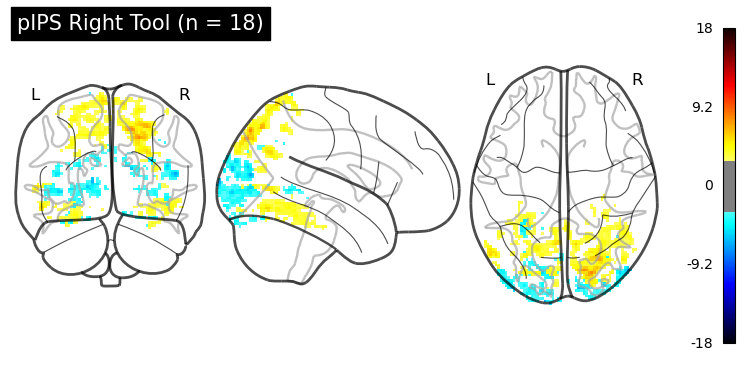


Processing pIPS_left...
Group average saved to: group_average_tool_pIPS_left_1217.nii.gz


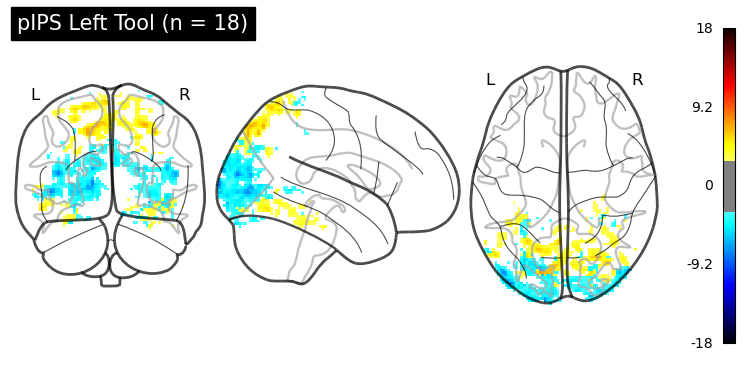


Processing LO_right...
Group average saved to: group_average_tool_LO_right_1217.nii.gz


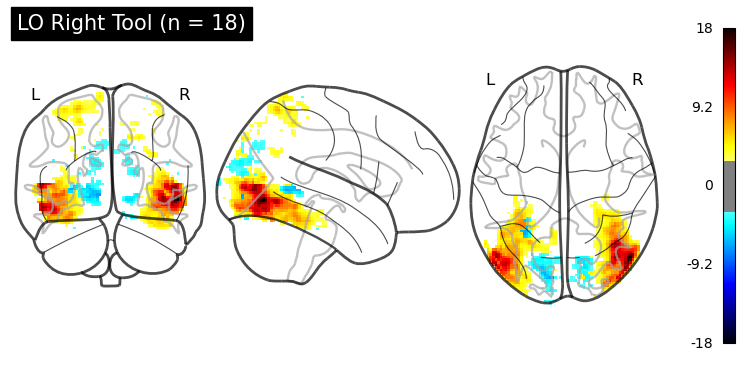


Processing LO_left...
Group average saved to: group_average_tool_LO_left_1217.nii.gz


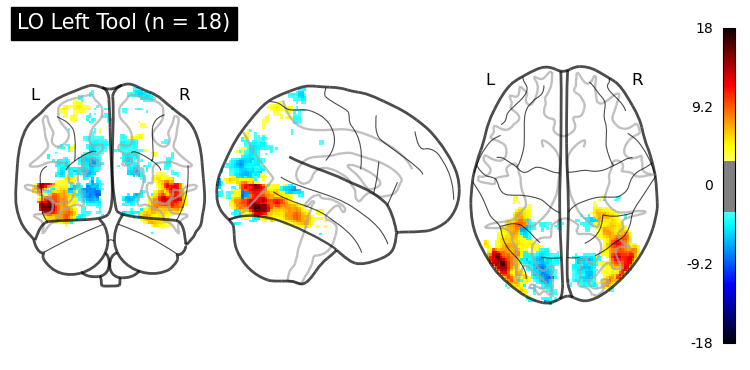


Processing complete.


In [14]:
# TOOL
# searchlight plots, red means roi predicts region, blue means region predicts roi

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
import glob
import os
import re

def load_and_average(file_pattern):
    """Helper function to load and average files"""
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching the pattern: {file_pattern}")
        return None, None, []
    
    # Extract and sort subject numbers
    subject_files = {}
    for f in files:
        match = re.search(r'sub-spaceloc(\d+)', f)
        if match:
            subject_files[match.group(1)] = f
    
    sorted_subjects = sorted(subject_files.keys(), key=int)
    
    # Load all images
    images = [nib.load(subject_files[subject]) for subject in sorted_subjects]
    
    # Check if all images have the same shape
    shapes = [img.shape for img in images]
    if len(set(shapes)) > 1:
        print("Error: Not all images have the same shape.")
        return None, None, []
    
    # Calculate the average
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)
    
    return avg_data, avg_img, sorted_subjects

def find_global_scale(base_path, regions):
    """Find global min and max values across all group averages"""
    all_averages = []
    
    for region in regions:
        file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni_1217.nii.gz'
        avg_data, _, _ = load_and_average(file_pattern)
        if avg_data is not None:
            all_averages.append(avg_data)
    
    if all_averages:
        global_min = min(np.min(avg) for avg in all_averages)
        global_max = max(np.max(avg) for avg in all_averages)
        return global_min, global_max
    return None, None

def group_average(file_pattern, region, vmin, vmax, threshold):
    # Load and average data
    avg_data, avg_img, sorted_subjects = load_and_average(file_pattern)
    
    if avg_img is None:
        return
    
    # Save the average image
    output_path = f'group_average_tool_{region}_1217.nii.gz'
    nib.save(avg_img, output_path)
    print(f"Group average saved to: {output_path}")

    # Format the title
    region_parts = region.split('_')
    if len(region_parts) == 2:
        title = f"{region_parts[0]} {region_parts[1].capitalize()} Tool (n = {len(sorted_subjects)})"

    # Load masks
    mask_dir = '/user_data/csimmon2/git_repos/ptoc/roiParcels'
    dorsal_mask = image.load_img(os.path.join(mask_dir, 'dorsal_visual_cortex.nii.gz'))
    ventral_mask = image.load_img(os.path.join(mask_dir, 'ventral_visual_cortex.nii.gz'))
    
    # Create combined visual pathway mask (dorsal OR ventral)
    combined_mask = image.math_img('(img1 + img2) > 0', img1=dorsal_mask, img2=ventral_mask)
    
    # Apply combined mask to the data
    masked_data = image.math_img('img1 * img2', img1=avg_img, img2=combined_mask)
    
    # Plot single glass brain with all visual pathways
    display = plotting.plot_glass_brain(
        masked_data,
        threshold=threshold,
        colorbar=True,
        plot_abs=False,
        vmin=vmin,
        vmax=vmax,
        title=title
    )
    
    plt.show()

# Base path
base_path = '/lab_data/behrmannlab/vlad/ptoc'

# Regions to process
regions = ['pIPS_right', 'pIPS_left', 'LO_right', 'LO_left']

# First find global min and max
print("Calculating global scale...")
global_min, global_max = find_global_scale(base_path, regions)
print(f"Global value range: {global_min:.2f} to {global_max:.2f}")

# Set symmetric limits based on the absolute maximum value
sym_max = max(abs(global_min), abs(global_max))
vmin, vmax = -sym_max, sym_max
##to manually set the scales replace the above line with the following line
#vmin, vmax = -18, 18  # Matching your example range

# Set threshold
threshold = 3

print(f"Using scale: {vmin:.2f} to {vmax:.2f}")
print(f"Using threshold: {threshold:.2f}")

# Loop through regions
for region in regions:
    print(f"\nProcessing {region}...")
    file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni_1217.nii.gz'
    group_average(file_pattern, region, vmin=vmin, vmax=vmax, threshold=threshold)

print("\nProcessing complete.")

Calculating global scale...
Global value range: -9.75 to 15.16
Using scale: -15.16 to 15.16
Using threshold: 3.00

Processing pIPS_right...
Group average saved to: group_average_nontool_pIPS_right_1217.nii.gz


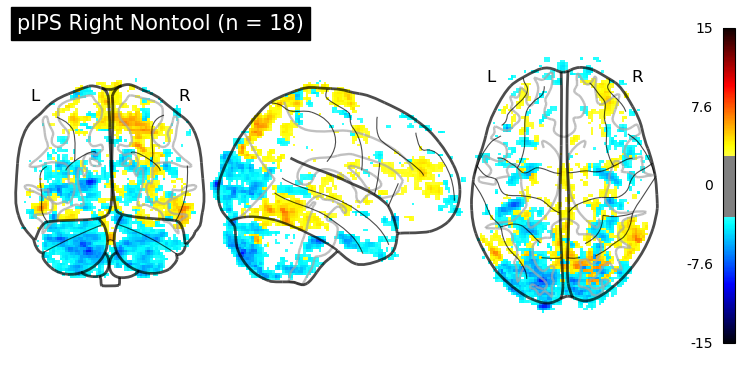


Processing pIPS_left...
Group average saved to: group_average_nontool_pIPS_left_1217.nii.gz


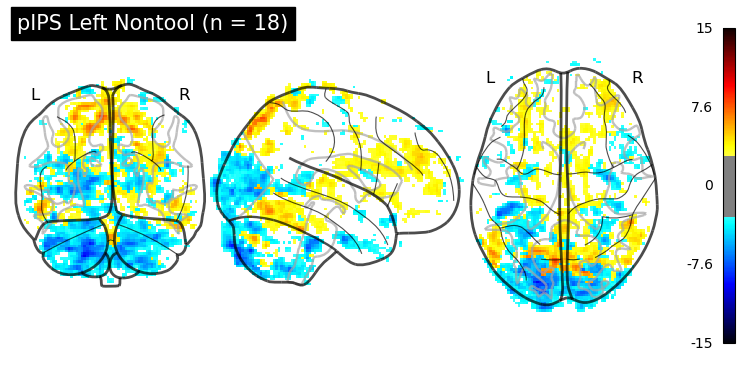


Processing LO_right...
Group average saved to: group_average_nontool_LO_right_1217.nii.gz


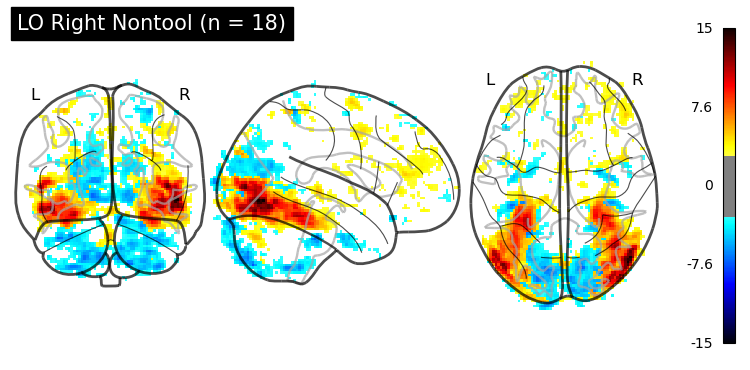


Processing LO_left...
Group average saved to: group_average_nontool_LO_left_1217.nii.gz


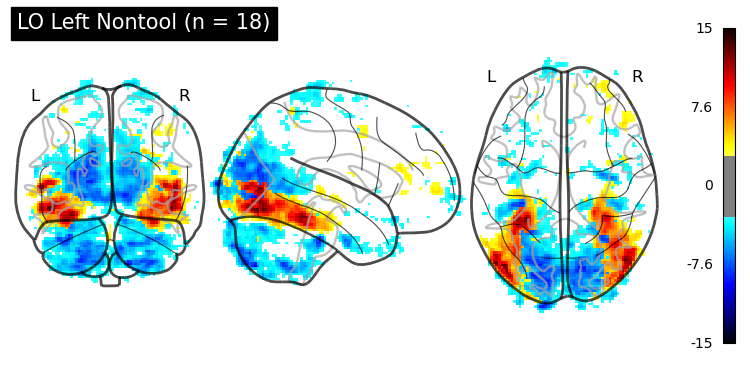


Processing complete.


In [4]:
# NONTOOL
# searchlight plots, red means roi predicts region, blue means region predicts roi

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import glob
import os
import re

def load_and_average(file_pattern):
    """Helper function to load and average files"""
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching the pattern: {file_pattern}")
        return None, None, []
    
    # Extract and sort subject numbers
    subject_files = {}
    for f in files:
        match = re.search(r'sub-spaceloc(\d+)', f)  # Updated regex pattern
        if match:
            subject_files[match.group(1)] = f
    
    sorted_subjects = sorted(subject_files.keys(), key=int)
    
    # Load all images
    images = [nib.load(subject_files[subject]) for subject in sorted_subjects]
    
    # Check if all images have the same shape
    shapes = [img.shape for img in images]
    if len(set(shapes)) > 1:
        print("Error: Not all images have the same shape.")
        return None, None, []
    
    # Calculate the average
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)
    
    return avg_data, avg_img, sorted_subjects

def find_global_scale(base_path, regions):
    """Find global min and max values across all group averages"""
    all_averages = []
    
    for region in regions:
        file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_nontool_{region}_mni_1217.nii.gz'  # Updated pattern
        avg_data, _, _ = load_and_average(file_pattern)
        if avg_data is not None:
            all_averages.append(avg_data)
    
    if all_averages:
        global_min = min(np.min(avg) for avg in all_averages)
        global_max = max(np.max(avg) for avg in all_averages)
        return global_min, global_max
    return None, None

def group_average(file_pattern, region, vmin, vmax, threshold):
    # Load and average data
    avg_data, avg_img, sorted_subjects = load_and_average(file_pattern)
    
    if avg_img is None:
        return
    
    # Save the average image
    output_path = f'group_average_nontool_{region}_1217.nii.gz'  # Updated filename
    nib.save(avg_img, output_path)
    print(f"Group average saved to: {output_path}")

    # Format the title: split the region name and format it nicely
    region_parts = region.split('_')
    if len(region_parts) == 2:
        title = f"{region_parts[0]} {region_parts[1].capitalize()} Nontool (n = {len(sorted_subjects)})"  # Added 'Tool'

    # Display the average image with consistent scaling
    plotting.plot_glass_brain(avg_img, threshold=threshold, colorbar=True, 
                            plot_abs=False, vmin=vmin, vmax=vmax,
                            title=title)
    plt.show()

# Base path
base_path = '/lab_data/behrmannlab/vlad/ptoc'

# Regions to process
regions = ['pIPS_right', 'pIPS_left', 'LO_right', 'LO_left']

# First find global min and max
print("Calculating global scale...")
global_min, global_max = find_global_scale(base_path, regions)
print(f"Global value range: {global_min:.2f} to {global_max:.2f}")

# Set symmetric limits based on the absolute maximum value
sym_max = max(abs(global_min), abs(global_max))
vmin, vmax = -sym_max, sym_max
##to manually set the scales replace the above line with the following line
#vmin, vmax = -25, 25

# Set threshold as a percentage of the maximum value (e.g., 10%)
#threshold = 0.1 * sym_max # see justifications above, 1.52
#threshold = 4
threshold = 3

print(f"Using scale: {vmin:.2f} to {vmax:.2f}")
print(f"Using threshold: {threshold:.2f}")

# Loop through regions
for region in regions:
    print(f"\nProcessing {region}...")
    file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_nontool_{region}_mni_1217.nii.gz'
    group_average(file_pattern, region, vmin=vmin, vmax=vmax, threshold=threshold)

print("\nProcessing complete.")

In [ ]:
# NONTOOL
# searchlight plots, red means roi predicts region, blue means region predicts roi

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
import glob
import os
import re

def load_and_average(file_pattern):
    """Helper function to load and average files"""
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching the pattern: {file_pattern}")
        return None, None, []
    
    # Extract and sort subject numbers
    subject_files = {}
    for f in files:
        match = re.search(r'sub-spaceloc(\d+)', f)
        if match:
            subject_files[match.group(1)] = f
    
    sorted_subjects = sorted(subject_files.keys(), key=int)
    
    # Load all images
    images = [nib.load(subject_files[subject]) for subject in sorted_subjects]
    
    # Check if all images have the same shape
    shapes = [img.shape for img in images]
    if len(set(shapes)) > 1:
        print("Error: Not all images have the same shape.")
        return None, None, []
    
    # Calculate the average
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)
    
    return avg_data, avg_img, sorted_subjects

def find_global_scale(base_path, regions):
    """Find global min and max values across all group averages"""
    all_averages = []
    
    for region in regions:
        file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_nontool_{region}_mni_1217.nii.gz'
        avg_data, _, _ = load_and_average(file_pattern)
        if avg_data is not None:
            all_averages.append(avg_data)
    
    if all_averages:
        global_min = min(np.min(avg) for avg in all_averages)
        global_max = max(np.max(avg) for avg in all_averages)
        return global_min, global_max
    return None, None

def group_average(file_pattern, region, vmin, vmax, threshold):
    # Load and average data
    avg_data, avg_img, sorted_subjects = load_and_average(file_pattern)
    
    if avg_img is None:
        return
    
    # Save the average image
    output_path = f'group_average_nontool_{region}_1217.nii.gz'
    nib.save(avg_img, output_path)
    print(f"Group average saved to: {output_path}")

    # Format the title
    region_parts = region.split('_')
    if len(region_parts) == 2:
        title = f"{region_parts[0]} {region_parts[1].capitalize()} Nontool (n = {len(sorted_subjects)})"

    # Load masks
    mask_dir = '/user_data/csimmon2/git_repos/ptoc/roiParcels'
    dorsal_mask = image.load_img(os.path.join(mask_dir, 'dorsal_visual_cortex.nii.gz'))
    ventral_mask = image.load_img(os.path.join(mask_dir, 'ventral_visual_cortex.nii.gz'))
    
    # Create combined visual pathway mask (dorsal OR ventral)
    combined_mask = image.math_img('(img1 + img2) > 0', img1=dorsal_mask, img2=ventral_mask)
    
    # Apply combined mask to the data
    masked_data = image.math_img('img1 * img2', img1=avg_img, img2=combined_mask)
    
    # Plot single glass brain with all visual pathways
    display = plotting.plot_glass_brain(
        masked_data,
        threshold=threshold,
        colorbar=True,
        plot_abs=False,
        vmin=vmin,
        vmax=vmax,
        title=title
    )
    
    plt.show()

# Base path
base_path = '/lab_data/behrmannlab/vlad/ptoc'

# Regions to process
regions = ['pIPS_right', 'pIPS_left', 'LO_right', 'LO_left']

# First find global min and max
print("Calculating global scale...")
global_min, global_max = find_global_scale(base_path, regions)
print(f"Global value range: {global_min:.2f} to {global_max:.2f}")

# Set symmetric limits based on the absolute maximum value
sym_max = max(abs(global_min), abs(global_max))
vmin, vmax = -sym_max, sym_max
##to manually set the scales replace the above line with the following line
#vmin, vmax = -18, 18

# Set threshold
threshold = 3

print(f"Using scale: {vmin:.2f} to {vmax:.2f}")
print(f"Using threshold: {threshold:.2f}")

# Loop through regions
for region in regions:
    print(f"\nProcessing {region}...")
    file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_nontool_{region}_mni_1217.nii.gz'
    group_average(file_pattern, region, vmin=vmin, vmax=vmax, threshold=threshold)

print("\nProcessing complete.")

In [ ]:
# same script as above, but uses more standard path calling.
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import os
import pandas as pd

# Setup paths
project_dir = '/user_data/csimmon2/git_repos/ptoc'
exp = 'spaceloc'
study_dir = f'/lab_data/behrmannlab/vlad/{exp}'

# Add print statement to check initial paths
print(f"Project directory: {project_dir}")
print(f"Study directory: {study_dir}")

# Load subject list from CSV
sub_info = pd.read_csv(f'{project_dir}/sub_info_tool.csv')
sub_list = sub_info[sub_info['exp'] == 'spaceloc']['sub'].tolist()

def calculate_group_average(sub_list, region, study_dir):
    """
    Calculate group average for a specific region across subjects
    """
    all_data = []
    valid_subjects = []
    
    for sub in sub_list:
        # Construct the full file path
        filepath = os.path.join(study_dir, 
                              f'sub-spaceloc{sub}', 
                              'ses-01', 
                              'derivatives',
                              'gca',
                              f'combined_tool_{region}_mni_1217.nii.gz')
        
        # Add print statement to see each attempted filepath
        print(f"\nAttempting to load file:\n{filepath}")
        
        # Check if file exists
        if os.path.exists(filepath):
            print(f"File exists: {filepath}")
            try:
                img = nib.load(filepath)
                all_data.append(img.get_fdata())
                valid_subjects.append(sub)
                print(f"Successfully loaded subject {sub} for {region}")
            except Exception as e:
                print(f"Error loading subject {sub} for {region}: {e}")
        else:
            print(f"FILE NOT FOUND: {filepath}")

    print(f"\nTotal files attempted: {len(sub_list)}")
    print(f"Successfully loaded: {len(valid_subjects)}")
    
    if not all_data:
        print(f"No valid data found for {region}")
        return None
    
    # Calculate average
    avg_data = np.mean(all_data, axis=0)
    avg_img = nib.Nifti1Image(avg_data, img.affine, img.header)
    
    return avg_img, valid_subjects
def plot_brain_map(avg_img, region, n_subjects, vmin, vmax, threshold):
    """
    Plot the brain map for a specific region
    """
    region_parts = region.split('_')
    if len(region_parts) == 2:
        title = f"{region_parts[0]} {region_parts[1].capitalize()} Tool (n = {n_subjects})"
    
    plotting.plot_glass_brain(avg_img, 
                            threshold=threshold,
                            colorbar=True,
                            plot_abs=False,
                            vmin=vmin,
                            vmax=vmax,
                            title=title)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Define parameters
    regions = ['pIPS_right', 'pIPS_left', 'LO_right', 'LO_left']
    threshold = 4
    vmin, vmax = -25, 25
    
    # Print info about subjects
    print(f"Total subjects found in CSV: {len(sub_list)}")
    print("Subject IDs:", sub_list)
    
    # Process each region
    for region in regions:
        print(f"\nProcessing {region}...")
        
        # Calculate group average
        result = calculate_group_average(sub_list, region, study_dir)
        
        if result:
            avg_img, valid_subjects = result
            
            # Plot results
            plot_brain_map(avg_img, 
                         region, 
                         len(valid_subjects), 
                         vmin, 
                         vmax, 
                         threshold)
            
            # Save the average image
            output_path = f'group_average_tool_{region}_1217.nii.gz'
            nib.save(avg_img, output_path)
            print(f"Group average saved to: {output_path}")
            print(f"Number of subjects included in average: {len(valid_subjects)}")